# Cluster Analysis with Python: A Machine Learning Approach

## Script content
#### 1. Importing Libraries and Data set
#### 2. Data Preparation 
#### 3. Elbow Technique
#### 4. K-Means clustering

## 1. Importing Libraries and Data set

In [4]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pylab as pl
from sklearn.decomposition import PCA

In [5]:
# Define path

path = r'/Users/tanu/Desktop/Data Analytics/Achievement 6/Data'

In [6]:
df= pd.read_csv(os.path.join(path,'Prepared data','Global_Cybersecurity_Treats.csv'))

In [7]:
df.shape

(3000, 11)

In [8]:
df.head()

,Unnamed: 0,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
0,0,China,2019,Phishing,Education,80.53,773169,Hacker Group,Unpatched Software,VPN,63
1,1,China,2019,Ransomware,Retail,62.19,295961,Hacker Group,Unpatched Software,Firewall,71
2,2,India,2017,Man-in-the-Middle,IT,38.65,605895,Hacker Group,Weak Passwords,VPN,20
3,3,UK,2024,Ransomware,Telecommunications,41.44,659320,Nation-state,Social Engineering,AI-based Detection,7
4,4,Germany,2018,Man-in-the-Middle,IT,74.41,810682,Insider,Social Engineering,VPN,68


## Data Preparation

In [10]:
# Dropping unnamed column

df.drop(columns=['Unnamed: 0',], inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Country                              3000 non-null   object 
 1   Year                                 3000 non-null   int64  
 2   Attack Type                          3000 non-null   object 
 3   Target Industry                      3000 non-null   object 
 4   Financial Loss (in Million $)        3000 non-null   float64
 5   Number of Affected Users             3000 non-null   int64  
 6   Attack Source                        3000 non-null   object 
 7   Security Vulnerability Type          3000 non-null   object 
 8   Defense Mechanism Used               3000 non-null   object 
 9   Incident Resolution Time (in Hours)  3000 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 234.5+ KB


### Encoding important caregorical columns 
#### Following steps are perfomed with help of Chat Gpt

In [13]:
# Select columns to use for clustering

categorical_cols = ['Attack Type', 'Target Industry', 'Attack Source',
                    'Security Vulnerability Type', 'Defense Mechanism Used']
numerical_cols = ['Financial Loss (in Million $)', 'Number of Affected Users', 
                  'Incident Resolution Time (in Hours)']

In [14]:
# One-hot encode categorical columns

df_encoded = pd.get_dummies(df[categorical_cols + numerical_cols])

In [15]:
df_encoded.head()

,Financial Loss (in Million $),Number of Affected Users,Incident Resolution Time (in Hours),Attack Type_DDoS,Attack Type_Malware,Attack Type_Man-in-the-Middle,Attack Type_Phishing,Attack Type_Ransomware,Attack Type_SQL Injection,Target Industry_Banking,...,Attack Source_Unknown,Security Vulnerability Type_Social Engineering,Security Vulnerability Type_Unpatched Software,Security Vulnerability Type_Weak Passwords,Security Vulnerability Type_Zero-day,Defense Mechanism Used_AI-based Detection,Defense Mechanism Used_Antivirus,Defense Mechanism Used_Encryption,Defense Mechanism Used_Firewall,Defense Mechanism Used_VPN
0,80.53,773169,63,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,True
1,62.19,295961,71,False,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,True,False
2,38.65,605895,20,False,False,True,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
3,41.44,659320,7,False,False,False,False,True,False,False,...,False,True,False,False,False,True,False,False,False,False
4,74.41,810682,68,False,False,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True


In [16]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded)

## Elbow Technique

In [18]:
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

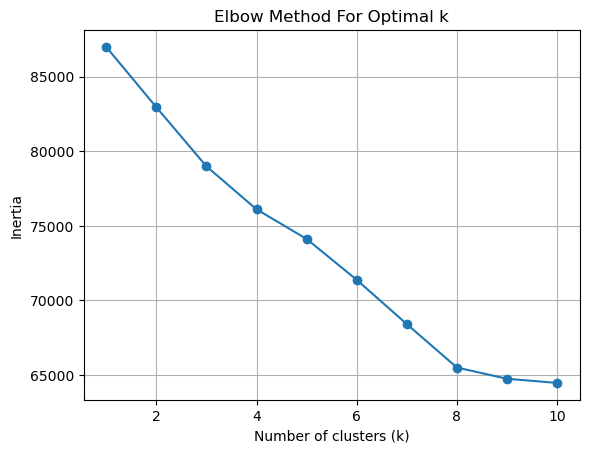

In [19]:
# Plot the elbow curve
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()

### Observation : 
#### The curve is almost negatively linear till 8 and then flattens out.
#### The Ideal number of clusters for this data will be 8

## K-means Clustering

In [22]:
# Create k-means object

kmeans =KMeans(n_clusters=8)
df['Cluster'] = kmeans.fit_predict(df_scaled)

In [23]:
# Fit the k-means object to the data frame
kmeans.fit(df_scaled)

KMeans()

In [24]:
df['Cluster'].value_counts()

Cluster
4    481
6    478
1    445
2    429
0    423
3    403
7    172
5    169
Name: count, dtype: int64

### Visualizations


In [26]:
df.head()

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours),Cluster
0,China,2019,Phishing,Education,80.53,773169,Hacker Group,Unpatched Software,VPN,63,4
1,China,2019,Ransomware,Retail,62.19,295961,Hacker Group,Unpatched Software,Firewall,71,0
2,India,2017,Man-in-the-Middle,IT,38.65,605895,Hacker Group,Weak Passwords,VPN,20,6
3,UK,2024,Ransomware,Telecommunications,41.44,659320,Nation-state,Social Engineering,AI-based Detection,7,7
4,Germany,2018,Man-in-the-Middle,IT,74.41,810682,Insider,Social Engineering,VPN,68,6


In [27]:
df_scaled.shape

(3000, 29)

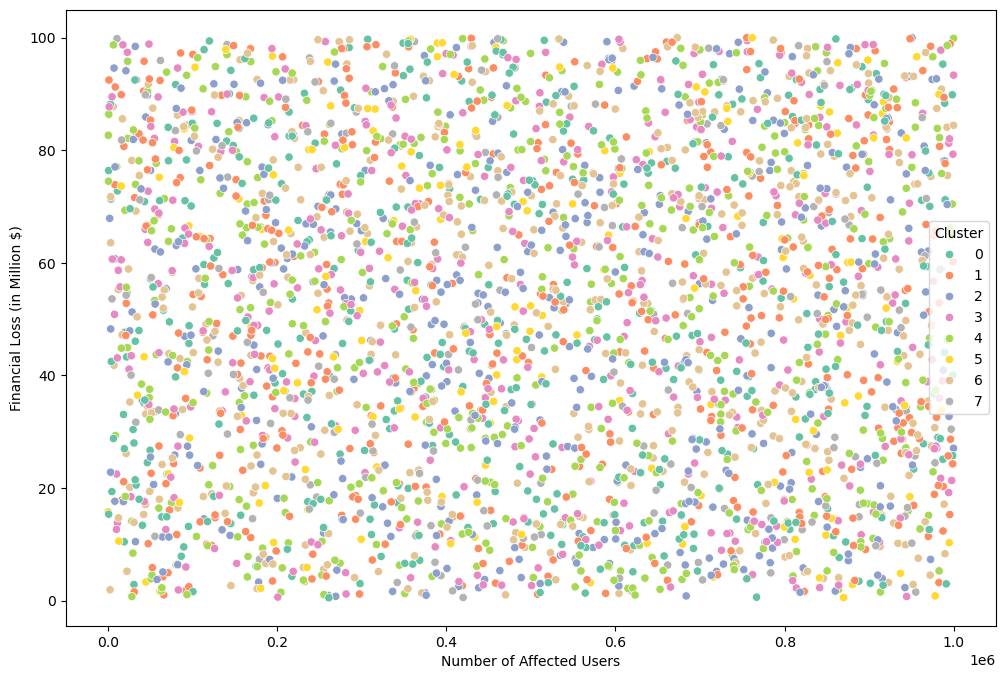

In [28]:
# Visualize the clusters in a scatterplot
plt.figure(figsize=(12,8))
ax = sns.scatterplot(
    data=df,
    x='Number of Affected Users',
    y='Financial Loss (in Million $)',
    hue='Cluster',
    palette = 'Set2')
plt.show()

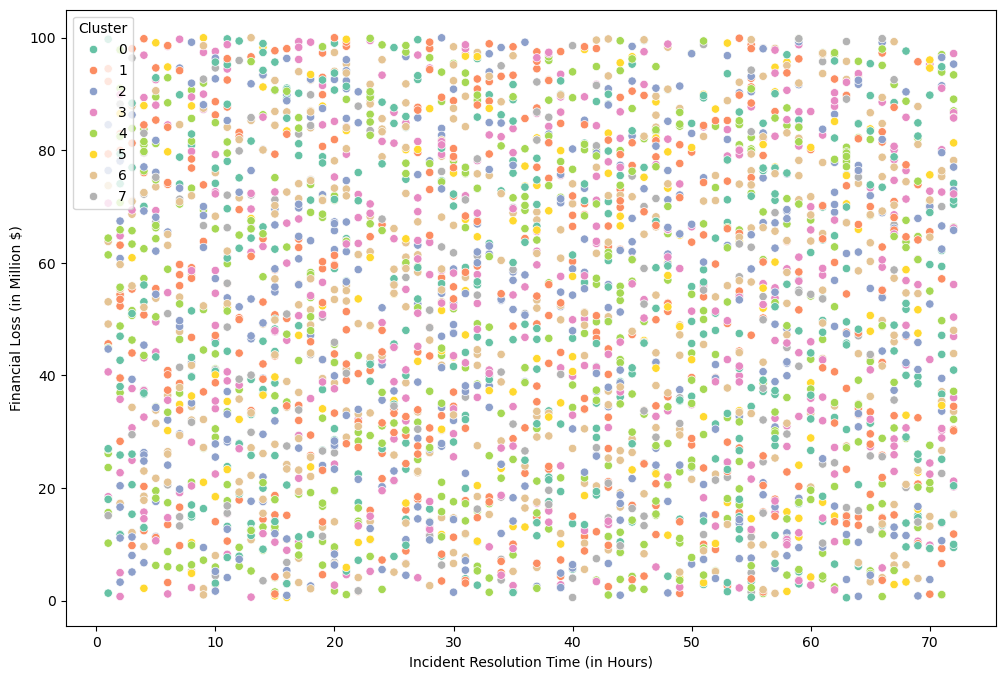

In [29]:
# Visualize the clusters in a scatterplot
plt.figure(figsize=(12,8))
ax_1= sns.scatterplot(
    data=df,
    x='Incident Resolution Time (in Hours)',
    y='Financial Loss (in Million $)',
    hue='Cluster',
    palette = 'Set2')
plt.show()

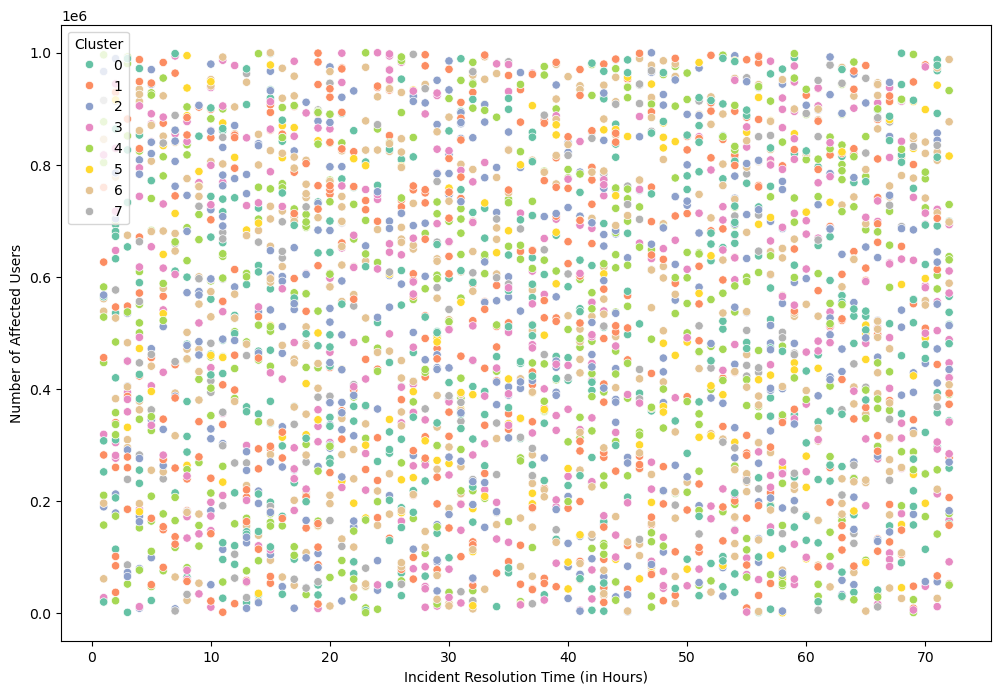

In [30]:
# Visualize the clusters in a scatterplot
plt.figure(figsize=(12,8))
ax_2 = sns.scatterplot(
    data=df,
    x='Incident Resolution Time (in Hours)',
    y='Number of Affected Users',
    hue='Cluster',
    palette = 'Set2')
plt.show()

### Descriptive statistics and Insights for clusters


In [32]:
# Calculate descriptive statistics for each cluster

df.loc[df['Cluster'] == 0, 'clusters'] = 'Teal'
df.loc[df['Cluster'] == 1, 'clusters'] = 'Orange'
df.loc[df['Cluster'] == 2, 'clusters'] = 'lavender'
df.loc[df['Cluster'] == 3, 'clusters'] = 'Pink'
df.loc[df['Cluster'] == 4, 'clusters'] = 'Green'
df.loc[df['Cluster'] == 5, 'clusters'] = 'Yellow'
df.loc[df['Cluster'] == 6, 'clusters'] = 'Light Brown'
df.loc[df['Cluster'] == 7, 'clusters'] = 'Grey'

df.groupby('clusters').agg({
    'Financial Loss (in Million $)': ['mean', 'median','std'], 
    'Number of Affected Users': ['mean', 'median','std'], 
    'Incident Resolution Time (in Hours)': ['mean', 'median','std'], 
  })

Financial Loss (in Million $)                     \
                                     mean  median        std   
clusters                                                       
Green                           49.227131  49.530  29.907958   
Grey                            47.452209  45.415  29.507339   
Light Brown                     51.903410  53.300  27.819676   
Orange                          51.173910  50.750  28.944020   
Pink                            52.618685  54.290  28.024369   
Teal                            49.928014  47.660  28.386133   
Yellow                          51.423018  51.660  29.893762   
lavender                        49.047296  51.710  28.768991   

            Number of Affected Users                           \
                                mean    median            std   
clusters                                                        
Green                  503811.777547  517640.0  287817.135902   
Grey                   505516.354651  462408.0  290704.813333   
Light Brown            523210.939331  541493.0  293123.965927   
Orange                 505839.114607  513005.0  302354.003783   
Pink                   499352.431762  492909.0  290644.983535   
Teal                   488833.063830  482700.0  285035.866991   
Yellow                 504671.976331  459635.0  284491.696550   
lavender               504130.340326  500521.0  282703.360428   

            Incident Resolution Time (in Hours)                    
                                           mean median        std  
clusters                                                           
Green                                 35.885655   37.0  20.830502  
Grey                                  36.238372   36.5  20.400841  
Light Brown                           36.169456   34.0  20.446036  
Orange                                35.737079   36.0  19.903044  
Pink                                  37.593052   37.0  21.316337  
Teal                                  37.219858   37.0  21.088201  
Yellow                                38.384615   39.0  19.340618  
lavender                              35.806527   35.0  20.457897

### Observation :
#### 1. Financial loss (in Million $)
    - mean difference between clusters is with in 3-5 M , which is much smaller than the Standard deviation for all the clusters. No statistically meanigful difference in financial loss between clusters.
#### 2. Number of affected users
    - Differnce between means of clusters are well within variability, hence not statistically significant
#### 3. Incident resolution time(Hours)
    - Resolution time do not differ significantly across clusters either.

In [33]:
print("\n--- Mean Numeric Features by Cluster ---\n")
print(df.groupby('Cluster')[numerical_cols].mean())


--- Mean Numeric Features by Cluster ---

         Financial Loss (in Million $)  Number of Affected Users  \
Cluster                                                            
0                            49.928014             488833.063830   
1                            51.173910             505839.114607   
2                            49.047296             504130.340326   
3                            52.618685             499352.431762   
4                            49.227131             503811.777547   
5                            51.423018             504671.976331   
6                            51.903410             523210.939331   
7                            47.452209             505516.354651   

         Incident Resolution Time (in Hours)  
Cluster                                       
0                                  37.219858  
1                                  35.737079  
2                                  35.806527  
3                                  37.593

In [72]:
print("\n--- Top Categories in Each Cluster ---\n")
for col in categorical_cols:
    print(f"\n{col} distribution by cluster:")
    print(df.groupby('Cluster')[col].value_counts(normalize=True).round(2))


--- Top Categories in Each Cluster ---


Attack Type distribution by cluster:
Cluster  Attack Type      
0        DDoS                 0.21
         SQL Injection        0.19
         Malware              0.18
         Ransomware           0.15
         Man-in-the-Middle    0.14
         Phishing             0.13
1        Malware              0.19
         DDoS                 0.18
         Ransomware           0.18
         SQL Injection        0.17
         Phishing             0.15
         Man-in-the-Middle    0.14
2        Phishing             0.22
         Man-in-the-Middle    0.17
         DDoS                 0.16
         SQL Injection        0.16
         Ransomware           0.16
         Malware              0.14
3        Phishing             0.21
         Ransomware           0.17
         Man-in-the-Middle    0.17
         Malware              0.16
         SQL Injection        0.15
         DDoS                 0.15
4        SQL Injection        0.19
         Ransomware

### OBSERVATION :

| Cluster   |    Target Industry      |     Top Attak         |      Sources        |     Vulnerabilities      |            Defense         
|-----------|-------------------------|-----------------------|---------------------|--------------------------|----------------------------|
| Cluster 0 | Telecommunications(100%)| DDoS (21%)            | Insider (27%)       | Unpatched software (27%) | VPN (23%)                  |
|           |                         |                       | Nation-state(26%)   | Zero-day (26%)           | Antivirus (21%)            |
|           |                         |                       |                     | Social engineering (26%) | AI based Detection (21%)   |
|-----------|-------------------------|-----------------------|---------------------|--------------------------|----------------------------|
| Cluster 1 | Healthcare (100%)       | All types (18-18%)    | Unknown (28%)       | Weak password (27%)      | Antivirus (22%)            |
|           |                         |                       |                     | Social engineering(26%)  | Firewall  (21%)            |
|-----------|-------------------------|-----------------------|---------------------|--------------------------|----------------------------|
| Cluster 2 | Banking (100%)          | Phishing (22%)        | Nation-state (27%)  | Evenly distributed       | VPN (22%)                  |
|           |                         |                       | Insider (28%)       |       (~ 24-26%)         | All equal (~19-20%)        |
|-----------|-------------------------|-----------------------|---------------------|--------------------------|----------------------------|
| Cluster 3 | Retail (100% )          | Phishing (21%)        | Nation state (30%)  | Zero-day (27%)           | Antivirus (23%)            |
|           |                         |                       |                     | Unpatched software (26%) | Firewall & VPN (21%)       |
|-----------|-------------------------|-----------------------|---------------------|--------------------------|----------------------------|
| Cluster 4 | Government (100%)       | SQL Injection (19%)   | Equally split       | Zero-day (28%)           | Firewall &                 |
|           |                         | Ransomware (18%)      | among all           | All equal (24%)          | Antivirus (22%)            |
|           |                         | & DDoS (18%)          |                     |                          |                            |
|-----------|-------------------------|-----------------------|---------------------|--------------------------|----------------------------|
| Cluster 5 | IT (100% )              | DDoS & Phishing (19%) | unknown (31%)       |  Zero-day (29%)          | Encryption (24%)           |
|           |                         |                       |                     |                          | AI based Detection (21%)   |
|-----------|-------------------------|-----------------------|---------------------|--------------------------|----------------------------|
| Cluster 6 |  Education (100%)       | SQL Injection (24%)   | Insider (28%)       | Weak Password (100%)     | Antivirus (29%)            |
|           |                         |                       | Nation-state (27%)  |                          |                            |
|-----------|-------------------------|-----------------------|---------------------|--------------------------|----------------------------|
| Cluster 7 |  Education (100%)       | All types (~18-18%)   | Insider &           | Sicial engineering (35%) | All equal (~20-21%)        |
|           |                         |                       | Nation-state (31%)  | Zero-day (34%)           |                            |
|           |                         |                       |                     | Unpatched software (31%) |                            |
|-----------|-------------------------|-----------------------|---------------------|--------------------------|----------------------------|

### INSIGHT 

#### Cluster 0 : For Telecommunication industry Nation-states and insiders are highly active, targeting known software weaknesses and   leveraging network-heavy attacks like DDoS.
#### Cluster 1 : For Healthcare industry attacks exploit human weaknesses and poor credential hygiene. Traditional defenses are still the go-to defence used in these industries .
#### Cluster 2 : Insider threats and phishing dominates Banking industry. Insider access is the prime source of attcak.
#### Cluster 3 : Retail is a target for advanced persistent threats (APTs), requiring more proactive defenses.
#### Cluster 4 : Government targets see a wide range of attacks and need better zero-day mitigation.
#### Cluster 5 : The IT sector faces stealthy, tech-savvy attacks, emphasizes the need for proactive AI-powered defenses.
#### Cluster 6 : Extremely vulnerable to credential-based attacks; weak password policies are the prime reason/source of all attacks.
#### Cluster 7 : This section of Education Industry is facing complex, multi-pronged threats with a slightly more mature defense stack than Cluster 6.

In [80]:
# Exporting Data set 

df.to_csv(os.path.join(path,'Prepared data','Global Cybersecurity Threats_1.csv'))

### The End